In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reaing dataset

In [2]:
data = pd.read_excel('Concrete_Dataset.xls')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### Taking x1, x2, y values and plotting them on graph

In [11]:
x1 = data['Cement (component 1)(kg in a m^3 mixture)'].values/100
x2 = data['Water  (component 4)(kg in a m^3 mixture)'].values/100
y = data['Concrete compressive strength(MPa, megapascals) '].values/10

Text(0.5, 0, 'Z')

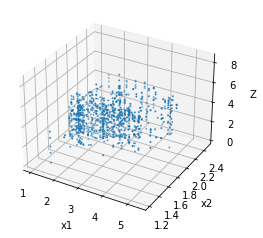

In [61]:
ax = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y , s=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Z')

# Cost Function

In [23]:
def cost_function(X, Y, theta):
    return np.sum(np.square(np.matmul(X, theta) - Y)) / (2 * len(Y))

# Gradient Decent Function

In [25]:
def gradient_decent_function(X, Y, alpha, iterations):
    theta = np.zeros(3)
    m = len(Y)
    
    for i in range(iterations):
        t0 = theta[0] - (alpha/m) * np.sum(np.matmul(X, theta) - Y)
        t1 = theta[1] - (alpha/m) * np.sum((np.matmul(X, theta) - Y) * X[:,1])
        t2 = theta[2] - (alpha/m) * np.sum((np.matmul(X, theta) - Y) * X[:,2])
        theta = np.array([t0, t1, t2])
        
    return theta

## Getting theta values from Gradient Decent Function

In [29]:
iterations = 10000
alpha = 0.1
X = np.column_stack((np.ones(len(x1)), x1, x2))
Y = y
theta = gradient_decent_function(X, Y, alpha, iterations)
print("theta: ", theta)
print("cost: ", cost_function(X, Y, theta))

theta:  [ 4.99634822  0.76313094 -1.96084229]
cost:  0.9615240692427146


## Plotting required plane on the graph

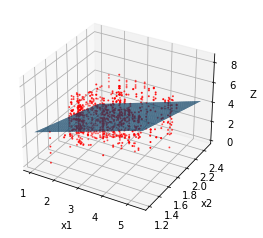

In [66]:
ax = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y , s=1, color='red')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Z')
samples1 = np.linspace(min(x1), max(x1))
samples2 = np.linspace(min(x2), max(x2))
samples11, samples22 = np.meshgrid(samples1,samples2)
Z = theta[0] + theta[1] * samples11 + theta[2] * samples22
ax.plot_surface(samples11, samples22, Z)